In [2]:
import pandas as pd

/usr/local/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                sep=',',
                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'normalized_text_stemm_emoji', 'sentiment']]
df.head()

,created_at,normalized_text_stemm_emoji,sentiment
0,2021-07-04 22:17:21,"[após, fic, silênci, cpi, carl, wizard, retorn...",Positivo
1,2019-11-30 14:35:33,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",Negativo
2,2022-01-11 12:12:28,"[defin, vacin, tip, subst, bactér, introduz, c...",Negativo
3,2019-11-19 14:52:06,"[iphon, segur, contr, ]",Positivo
4,2021-12-28 23:09:10,"[estrag, complet, tud, ]",Negativo


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['input'] = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join([word for word in x]))

vectorizer = CountVectorizer(lowercase=False, min_df=50)
X = vectorizer.fit_transform(df['input'].values)

print(vectorizer.get_feature_names())
print(X.toarray())

['18h', '20h', '24h', '48h', 'abaix', 'abal', 'abandon', 'abenço', 'abert', 'abord', 'abort', 'abr', 'abraç', 'abril', 'absolut', 'absurd', 'abus', 'acab', 'academ', 'acas', 'account', 'aceit', 'aceler', 'acerc', 'acert', 'acess', 'ach', 'acid', 'acim', 'acion', 'acomet', 'acompanh', 'aconselh', 'acontec', 'acord', 'acostum', 'acr', 'acredit', 'acumul', 'acus', 'adapt', 'adequ', 'adeu', 'adi', 'adiant', 'adic', 'adiv', 'adm', 'administr', 'admir', 'admit', 'adoec', 'adolesc', 'ador', 'adot', 'adquir', 'adult', 'advers', 'advog', 'aeroport', 'afast', 'afet', 'aff', 'afim', 'afinal', 'afirm', 'afric', 'aft', 'age', 'agend', 'agent', 'agind', 'agir', 'aglom', 'aglomer', 'agor', 'agost', 'agr', 'agradec', 'agradeç', 'agrav', 'agress', 'agu', 'aguard', 'agud', 'aguent', 'agulh', 'agênc', 'ai', 'aid', 'ain', 'aind', 'ajud', 'ala', 'alago', 'alarm', 'alastr', 'albert', 'alcanç', 'alcool', 'alcoól', 'alde', 'aleatóri', 'aleg', 'alegr', 'alem', 'alemanh', 'alenc', 'alerg', 'alert', 'alessandr',

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
Y = list(df['sentiment'].replace(['Positivo','Negativo','Neutro'],[1,-1,0]))

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [7]:
# Modelling
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [8]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [9]:
y_pred = svc.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.803075


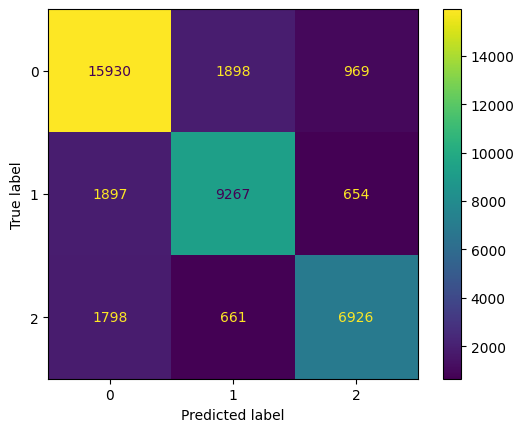

In [11]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.85      0.83     18797
           0       0.78      0.78      0.78     11818
           1       0.81      0.74      0.77      9385

    accuracy                           0.80     40000
   macro avg       0.80      0.79      0.80     40000
weighted avg       0.80      0.80      0.80     40000



In [13]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [15]:
svc.get_params()
# {'C': 1.0,
#  'break_ties': False,
#  'cache_size': 200,
#  'class_weight': None,
#  'coef0': 0.0,
#  'decision_function_shape': 'ovr',
#  'degree': 3,
#  'gamma': 'scale',
#  'kernel': 'rbf',
#  'max_iter': -1,
#  'probability': False,
#  'random_state': None,
#  'shrinking': True,
#  'tol': 0.001,
#  'verbose': False}

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
param_grid = {
 'C': [1.0],
 'break_ties': [False],
 'cache_size': [200],
 'class_weight': [None],
 'coef0': [0.0],
 'decision_function_shape': ['ovo', 'ovr'],
 'degree': [1,2,3,4,5],
 'gamma': ['scale'],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
 'max_iter': [-1],
 'probability': [False],
 'random_state': [None],
 'shrinking': [True],
 'tol': [0.001, 0.0001],
 'verbose': [False]
}

In [26]:
grid_search = GridSearchCV(SVC(),
                           param_grid=param_grid,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_
# {'max_depth': 9,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'n_estimators': 50}

In [ ]:
# rf = RandomForestClassifier(max_depth=None, max_features='auto',max_leaf_nodes= None, n_estimators= 150,criterion='entropy')

In [70]:
rf = RandomForestClassifier(max_depth=None, max_features='auto',max_leaf_nodes= None, n_estimators= 150,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [71]:
y_pred = rf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8013


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.82      0.83     18797
           0       0.76      0.80      0.78     11818
           1       0.80      0.76      0.78      9385

    accuracy                           0.80     40000
   macro avg       0.80      0.79      0.79     40000
weighted avg       0.80      0.80      0.80     40000

